# 1. Imports and preliminary settings.

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
colour_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

pd.set_option('display.max_columns', 500)

fred_key = 'enter_your_fred_api_key_here'

from fredapi import Fred

# 2. Create the fred object

In [293]:
fred = Fred(api_key = fred_key)

In [294]:
fred


# 3. Search for economic data

Fred allows us to search and pull down data directly into pandas.

In [295]:
sp_search = fred.search('S&P',order_by='popularity')
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-10-31   2023-10-31   
CSUSHPINSA          CSUSHPINSA     2023-10-31   2023-10-31   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-10-31   2023-10-31   
SP500                    SP500     2023-10-31   2023-10-31   
MEHOINUSA672N    MEHOINUSA672N     2023-10-31   2023-10-31   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-10-30  Daily, Close   
CSUSHPINSA            1987-01-01      2023-08-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-10-30  Daily, Close   
SP500                 2013-10-31      2023-10-30  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-10-31 09:15:02-05:00   
CSUSHPINSA                           NSA  2023-10-31 08:12:01-05:00   
BAMLH0A0HYM2EY                       NSA  2023-10-31 09:15:06-05:00   
SP500                                NSA  2023-10-30 19:10:51-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          81  Household data are collected as of March.  As ...

# 4. Pull raw data

<Axes: title={'center': 'S&P 500'}>

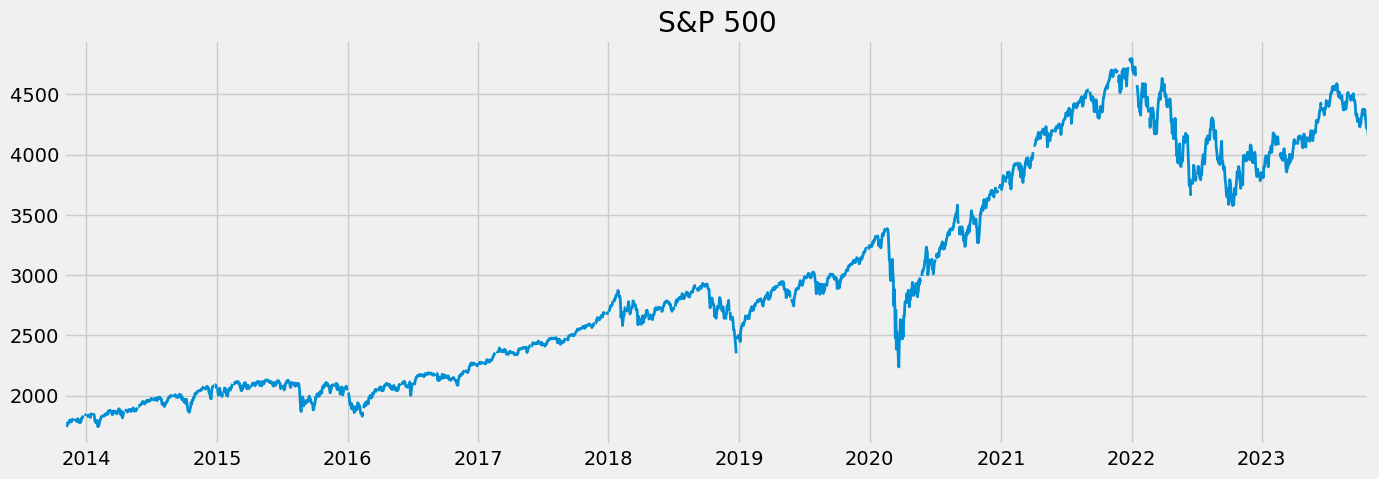

In [296]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize = (15,5), lw = '2', title = 'S&P 500')

# 5. Pull and join multiple datasets

In [297]:
unemp_results = fred.search('unemployment')
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2023-10-31   2023-10-31   
UNRATENSA                          UNRATENSA     2023-10-31   2023-10-31   
NROU                                    NROU     2023-10-31   2023-10-31   
UNEMPLOY                            UNEMPLOY     2023-10-31   2023-10-31   
CCSA                                    CCSA     2023-10-31   2023-10-31   
...                                      ...            ...          ...   
LRHUTTTTPTM156S              LRHUTTTTPTM156S     2023-10-31   2023-10-31   
LRUN64TTMXQ156S              LRUN64TTMXQ156S     2023-10-31   2023-10-31   
LRUN25TTCAM156S              LRUN25TTCAM156S     2023-10-31   2023-10-31   
ALBU735UR                          ALBU735UR     2023-10-31   2023-10-31   
LAUMT481778000000003A  LAUMT481778000000003A     2023-10-31   2023-10-31   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
NROU                                    Noncyclical Rate of Unemployment   
UNEMPLOY                                              Unemployment Level   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LRHUTTTTPTM156S        Harmonized Unemployment: Monthly Rates: Total:...   
LRUN64TTMXQ156S        Unemployment Rate: Aged 15-64: All Persons for...   
LRUN25TTCAM156S        Unemployment Rate: Aged 25-54: All Persons for...   
ALBU735UR                     Unemployment Rate in Albuquerque, NM (MSA)   
LAUMT481778000000003A  Unemployment Rate in College Station-Bryan, TX...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2023-09-01   
UNRATENSA                    1948-01-01      2023-09-01   
NROU                         1949-01-01      2025-10-01   
UNEMPLOY                     1948-01-01      2023-09-01   
CCSA                         1967-01-07      2023-10-14   
...                                 ...             ...   
LRHUTTTTPTM156S              1983-01-01      2023-08-01   
LRUN64TTMXQ156S              2005-01-01      2023-04-01   
LRUN25TTCAM156S              1976-01-01      2023-08-01   
ALBU735UR                    1990-01-01      2023-08-01   
LAUMT481778000000003A        1990-01-01      2022-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
NROU                                 Quarterly               Q   
UNEMPLOY                               Monthly               M   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LRHUTTTTPTM156S                        Monthly               M   
LRUN64TTMXQ156S                      Quarterly               Q   
LRUN25TTCAM156S                        Monthly               M   
ALBU735UR                              Monthly               M   
LAUMT481778000000003A                   Annual               A   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
NROU                                Percent                  %   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
CCSA                                 Numb

<Axes: title={'center': 'Unrate'}>

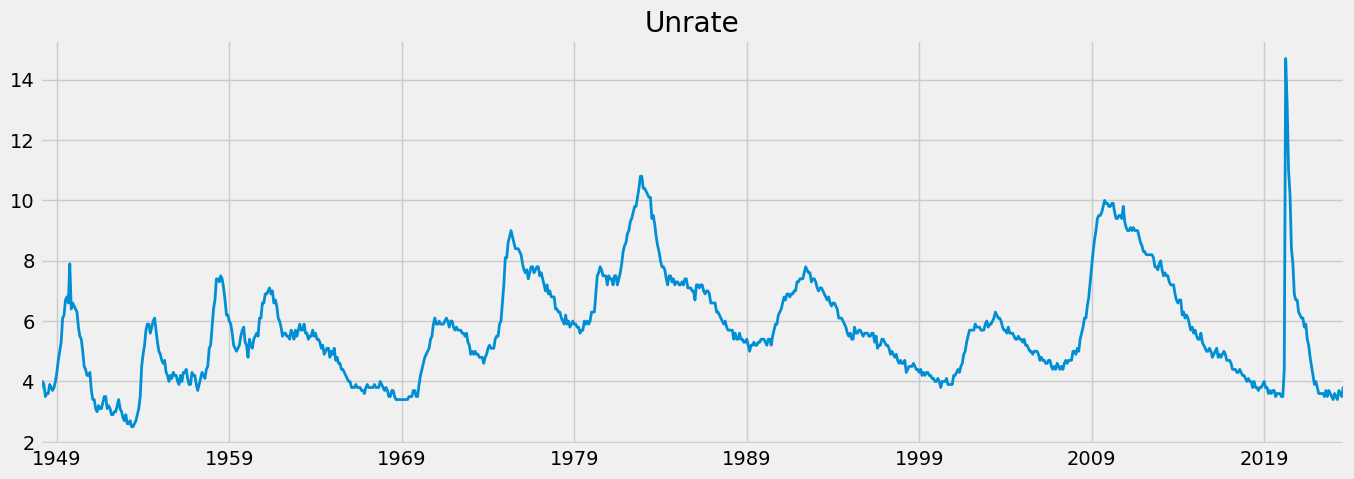

In [298]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize = (15,5),title = 'Unrate',lw = '2')

## Pull April 2020 unemployment rate per state

In [299]:
unemp_df = fred.search('unemployment rate state',filter = ('frequency','Monthly'))

In [300]:
# unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"').shape

unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [301]:
# unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')].shape
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [302]:
# len(unemp_df.index)
for myid in unemp_df.index:
    results = fred.get_series(myid)
    break
    # putting a break in here in order to just see what the first series in the loop looks like


In [303]:
results.to_frame(name = myid)
# this command converts it into a dataframe.

CAUR
1976-01-01   9.2
1976-02-01   9.2
1976-03-01   9.1
1976-04-01   9.1
1976-05-01   9.0
...          ...
2023-05-01   4.5
2023-06-01   4.6
2023-07-01   4.6
2023-08-01   4.6
2023-09-01   4.7

[573 rows x 1 columns]

In [305]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

# type(all_results)
unemp_states = pd.concat(all_results, axis = 1)\
.drop(['CENCUR','CNEWUR','CNERUR','USAURAMS','CWSTUR','CSOUUR','CMWRUR','LASMT391746000000003','LASMT261982000000003','LASMT261982000000003','LASMT391746000000003','CMWRUR','CSOUUR','CWSTUR','USAURAMS','CNEWUR','CENCUR','CNERUR'],axis = 1)

In [309]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in',"").to_dict()
id_to_state.update({"Dates" : "Dates"})

In [310]:
# Using list comprehension to change the state codes to the actual state names.
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

<Axes: >

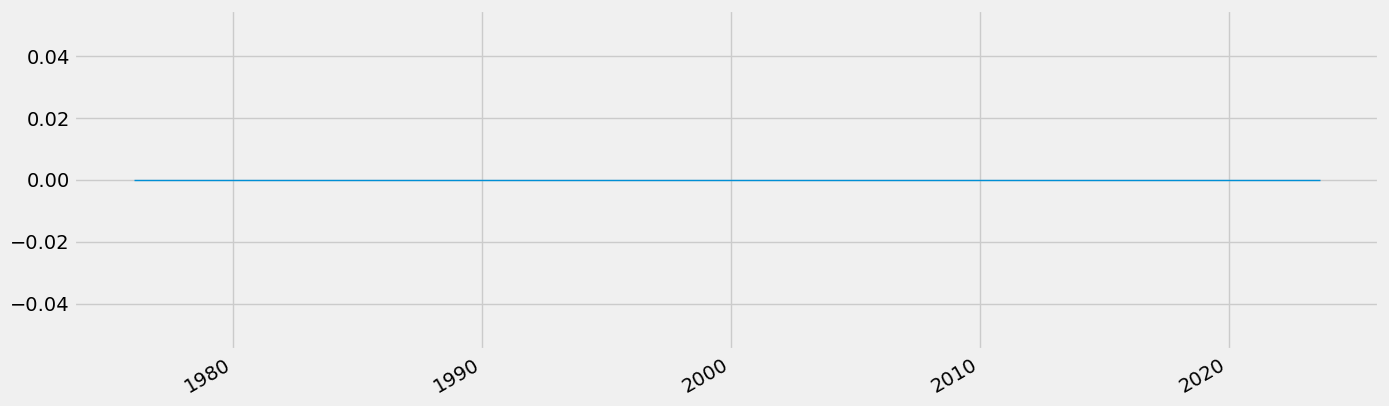

In [311]:
# id_to_state
# unemp_states.isna().sum(axis = 1).plot(figsize = (15,5), lw = 1)
unemp_states = unemp_states.dropna()
unemp_states.isna().sum(axis = 1).plot(figsize = (15,5), lw = 1)



In [313]:
# Since we are using the fred search whitch is an evolving database, I found it wise to create a csv of the data we require.
# This would help avoid us having to remove newly found irrelevant columns from the dataframe, everytime we run the code.

unemp_states.to_csv('unemp_states.csv')
# unemp_states = pd.read_csv('unemp_states.csv')
# unemp_states

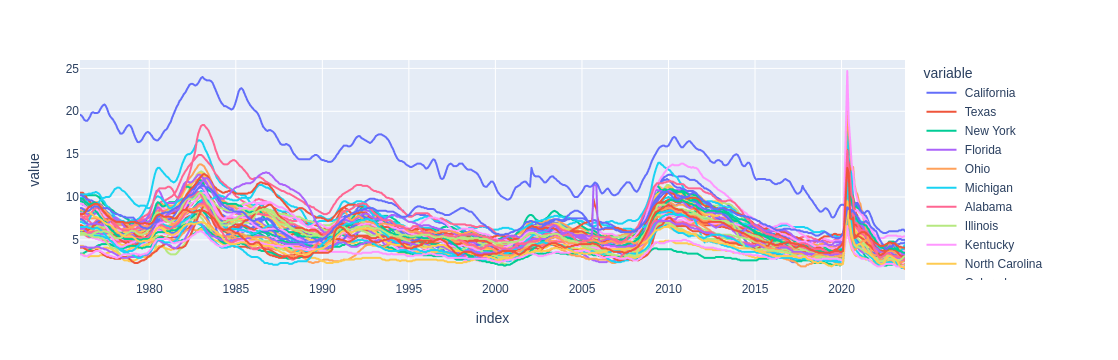

In [312]:
#unemp_states.plot(figsize = (15,5), lw = 1)
# 
# unemp_states = unemp_states.set_index('Dates')
px.line(unemp_states)
# unemp_states

In [308]:
unemp_states.loc[unemp_states.index == '2020-05-01']

CAUR  TXUR  NYUR  FLUR  OHUR  MIUR  ALUR  ILUR  KYUR  NCUR  COUR  \
2020-05-01  15.7  11.6  16.6  14.1  12.7  19.1  10.4  14.7  12.8  11.6  11.6   

            MAUR  GAUR  PAUR  WAUR  NJUR  WIUR  VAUR  MNUR  TNUR  AZUR  MOUR  \
2020-05-01  15.5   9.7  12.9  13.2  15.3  10.5  10.0  11.1  12.1  11.2   9.5   

            ORUR  INUR  MDUR  AKUR  WVUR  ARUR  NMUR  IAUR  SCUR  MSUR  NDUR  \
2020-05-01  11.8  12.4   8.8  11.9  12.4   8.9   9.3   8.3   9.2  11.2   7.2   

            LAUR  HIUR  UTUR  MTUR  OKUR  NVUR  NEUR  PRUR  WYUR  CTUR  KSUR  \
2020-05-01  12.2  20.8   7.7   9.2   9.7  24.7   6.3   8.9   8.7  11.7   9.3   

            MEUR  NHUR  RIUR  IDUR  SDUR  VTUR  DCUR  DEUR  
2020-05-01   9.4  11.7  15.4   9.0   6.6   9.5   8.8  13.4

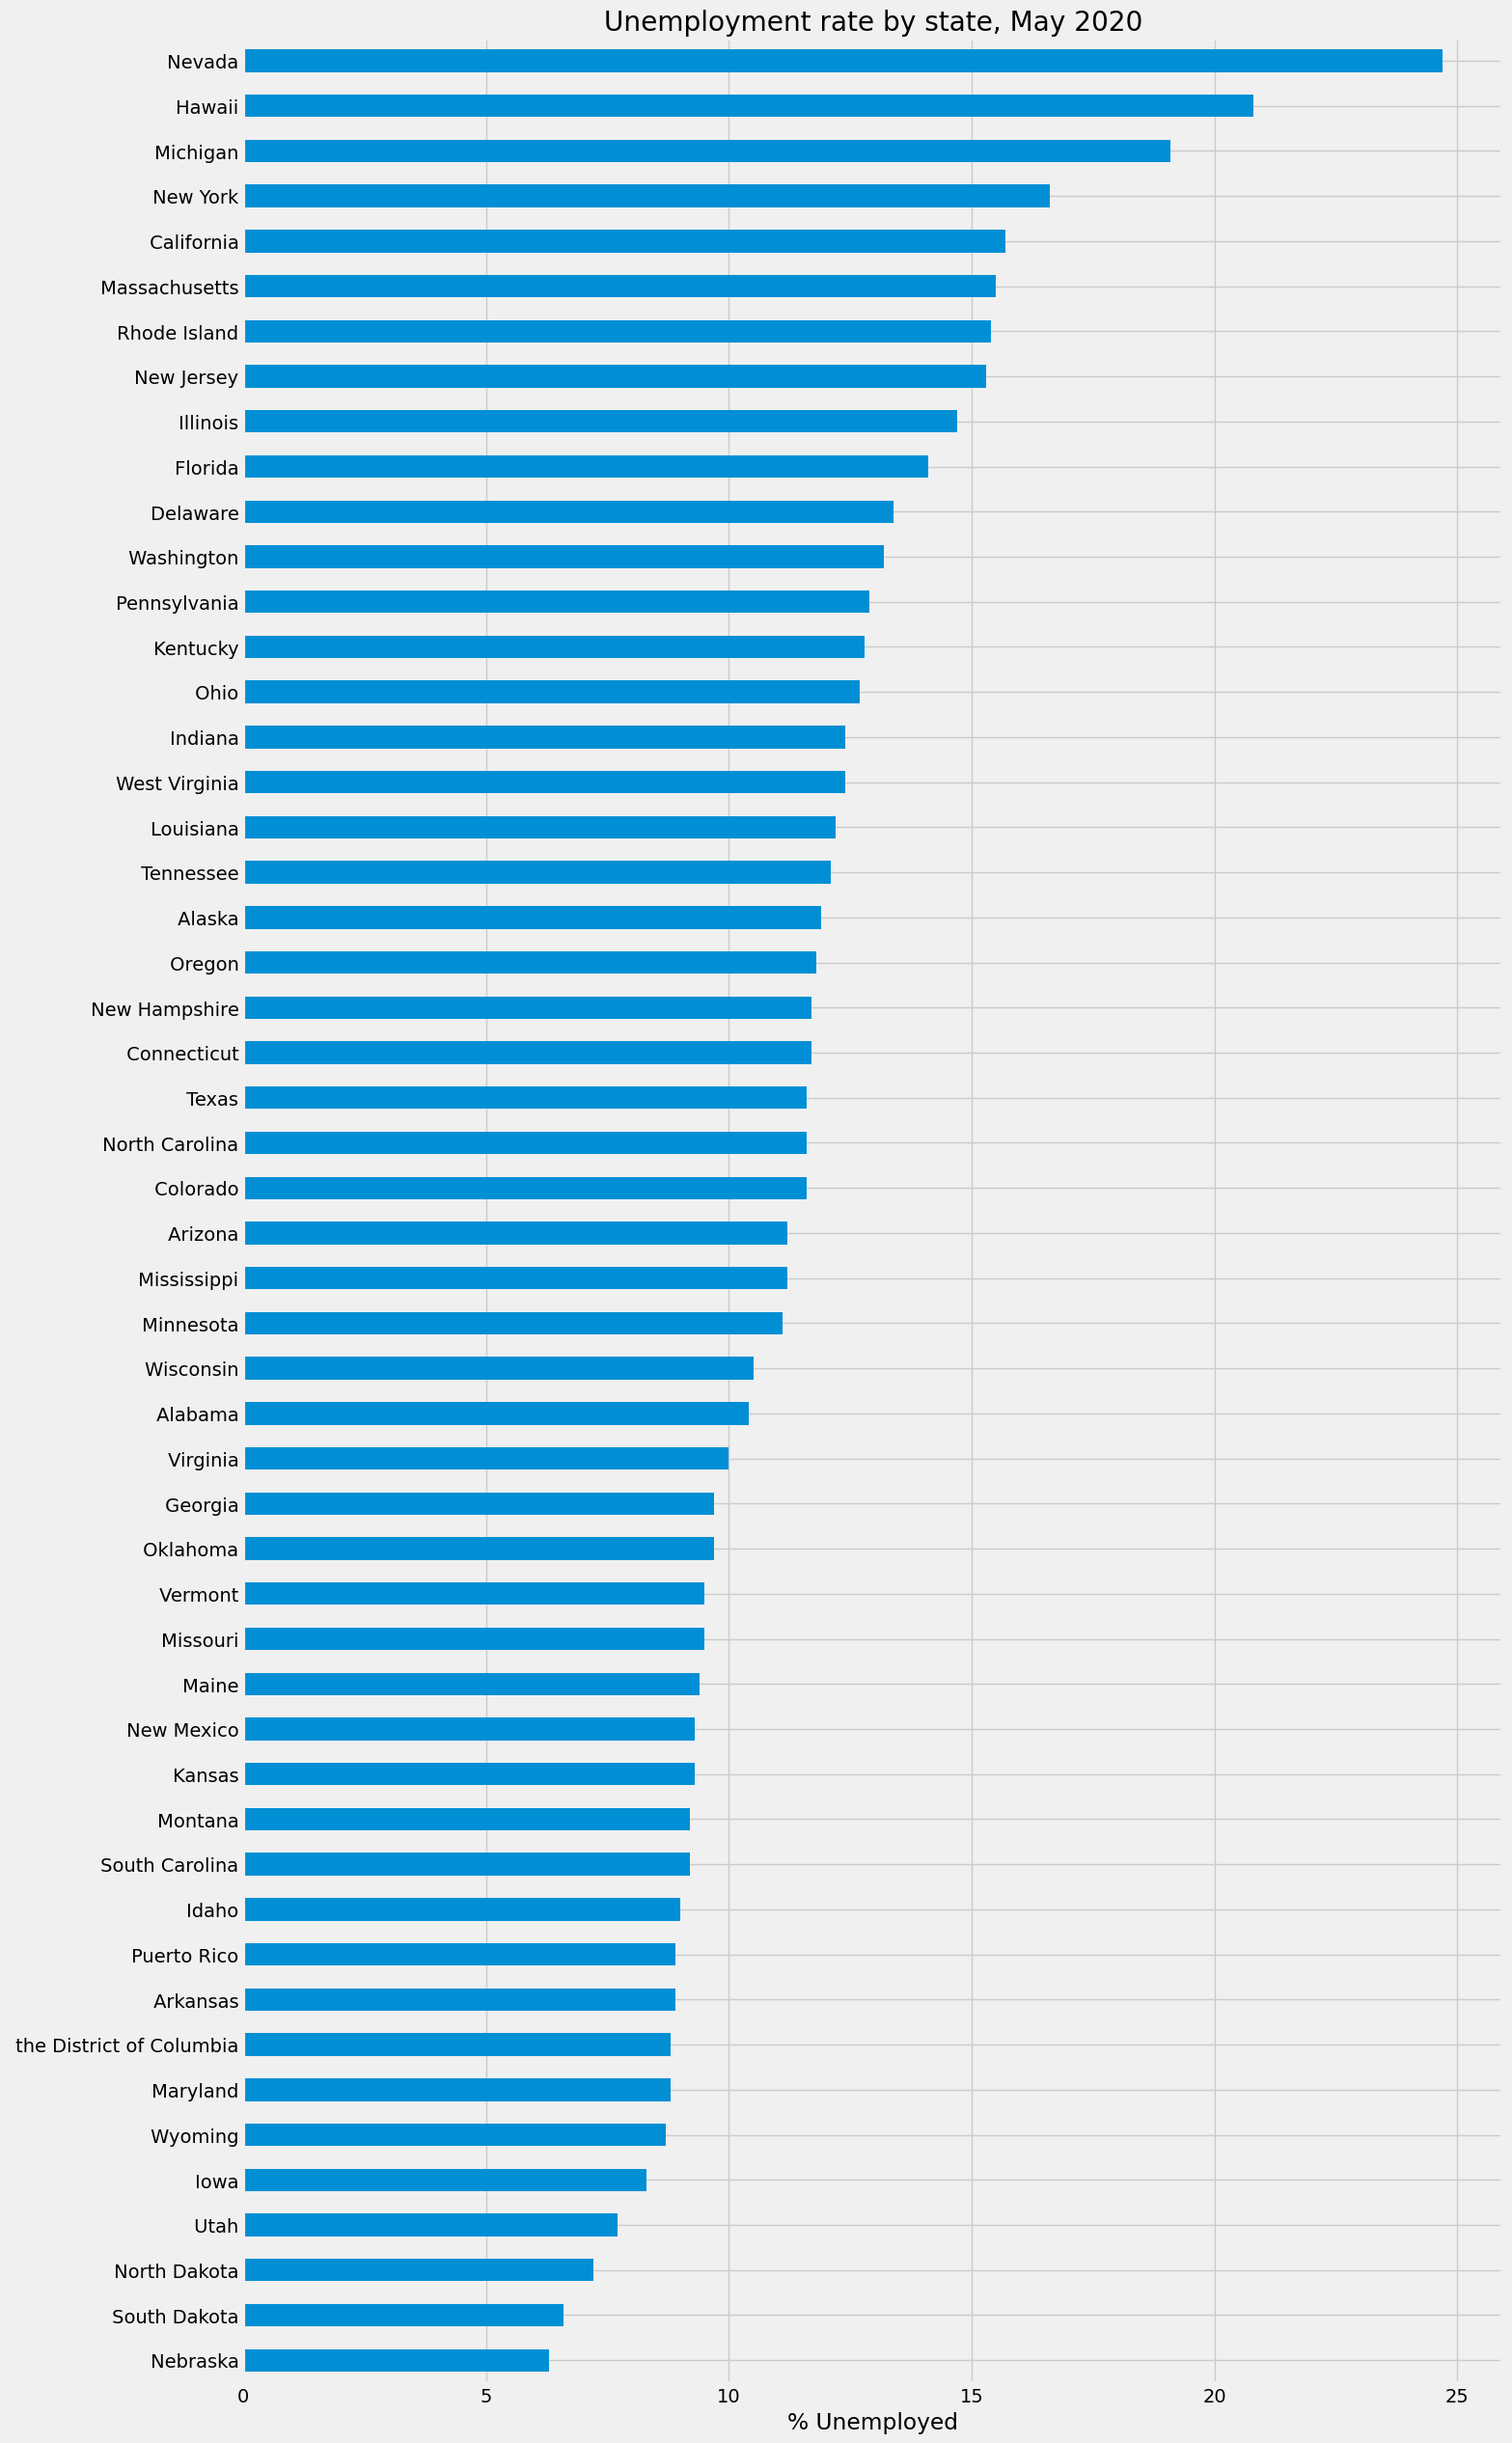

In [314]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T\
    .sort_values('2020-05-01')\
    .plot(kind = 'barh',figsize = (15,30), title = 'Unemployment rate by state, May 2020')

ax.legend().remove()
ax.set_xlabel("% Unemployed")
plt.show()
# unemp_states.index == '2020-05-01'

## Pull participation rate data:

In [315]:
part_df = fred.search('Labor Force Participation Rate for state', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [316]:
part_df
# .plot(figsize = (15,5),lw=1)

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2023-10-31   2023-10-31   
LNS11300060          LNS11300060     2023-10-31   2023-10-31   
LNS11300002          LNS11300002     2023-10-31   2023-10-31   
LNS11300001          LNS11300001     2023-10-31   2023-10-31   
LNS11324230          LNS11324230     2023-10-31   2023-10-31   
...                          ...            ...          ...   
LRIN55MAUSM156S  LRIN55MAUSM156S     2023-10-31   2023-10-31   
LRIN25TTUSM156S  LRIN25TTUSM156S     2023-10-31   2023-10-31   
LRIN74MAUSM156S  LRIN74MAUSM156S     2023-10-31   2023-10-31   
LRIN74TTUSM156S  LRIN74TTUSM156S     2023-10-31   2023-10-31   
LRIN25FEUSM156S  LRIN25FEUSM156S     2023-10-31   2023-10-31   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRIN55MAUSM156S  Inactivity Rate: Aged 55-64: Males for United ...   
LRIN25TTUSM156S  Inactivity Rate: Aged 25-54: All Persons for U...   
LRIN74MAUSM156S  Inactivity Rate: Aged 15-74: Males for United ...   
LRIN74TTUSM156S  Inactivity Rate: Aged 15-74: All Persons for U...   
LRIN25FEUSM156S  Inactivity Rate: Aged 25-54: Females for Unite...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2023-09-01   Monthly               M   
LNS11300060            1948-01-01      2023-09-01   Monthly               M   
LNS11300002            1948-01-01      2023-09-01   Monthly               M   
LNS11300001            1948-01-01      2023-09-01   Monthly               M   
LNS11324230            1948-01-01      2023-09-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN55MAUSM156S        1977-01-01      2023-08-01   Monthly               M   
LRIN25TTUSM156S        1977-01-01      2023-08-01   Monthly               M   
LRIN74MAUSM156S        1981-01-01      2023-08-01   Monthly               M   
LRIN74TTUSM156S        1981-01-01      2023-08-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2023-08-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN55MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN25TTUSM156S  Percent           %  Seasonally Adjusted   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN74TTUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2023-10-06 07:46:02-05:00   
LNS11300060                            SA 2023-10-06 07:46:06-05:00   
LNS11300002                            SA 2023-10-06 07:46:12-05:00   
LNS11300001                            SA 2023-10-06 07:46:13-05:00   
LNS11324230                           

In [317]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','')\
    .to_dict()

In [318]:
part_id_to_state

{'CIVPART': 'Labor Force Participation Rate',
 'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
 'LNS11300002': 'Labor Force Participation Rate - Women',
 'LNS11300001': 'Labor Force Participation Rate - Men',
 'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
 'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
 'LRAC25MAUSM156S': 'Activity Rate: Aged 25-54: Males for United States',
 'LRAC25FEUSM156S': 'Activity Rate: Aged 25-54: Females for United States',
 'LNS11300006': 'Labor Force Participation Rate - Black or African American',
 'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.',
 'LBSSA21': ' Kentucky',
 'LBSSA06': ' California',
 'LNS11327662': "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LBSSA01': ' Alabama',
 'LBSSA26': ' Michigan',
 'LBSSA12': ' Florida',
 'LBSSA36': ' New York',
 'LNS11300028': 'Labor Force Participation Rate - 20 Yrs. & over, White Men',
 'LNS11300031': 'Labor Force Pa

In [319]:
all_results_part = []
for myid in part_df.index:
    results_part = fred.get_series(myid)
    results_part = results_part.to_frame(name = myid)
    all_results_part.append(results_part)

# type(all_results)
part_states = pd.concat(all_results_part, axis = 1)

part_states

CIVPART  LNS11300060  LNS11300002  LNS11300001  LNS11324230  \
1948-01-01     58.6         64.2         32.0         86.7         43.0   
1948-02-01     58.9         64.6         32.4         87.0         43.3   
1948-03-01     58.5         64.3         32.1         86.3         43.0   
1948-04-01     59.0         64.8         33.0         86.6         43.4   
1948-05-01     58.3         64.3         32.0         86.1         43.2   
...             ...          ...          ...          ...          ...   
2023-05-01     62.6         83.4         57.3         68.1         38.4   
2023-06-01     62.6         83.5         57.3         68.1         38.3   
2023-07-01     62.6         83.4         57.4         68.0         38.6   
2023-08-01     62.8         83.5         57.7         68.2         38.8   
2023-09-01     62.8         83.5         57.5         68.3         38.8   

            LNS11300012  LRAC25MAUSM156S  LRAC25FEUSM156S  LNS11300006  \
1948-01-01         53.2              NaN              NaN          NaN   
1948-02-01         53.7              NaN              NaN          NaN   
1948-03-01         54.1              NaN              NaN          NaN   
1948-04-01         54.2              NaN              NaN          NaN   
1948-05-01         50.9              NaN              NaN          NaN   
...                 ...              ...              ...          ...   
2023-05-01         36.8             89.1             77.6         63.2   
2023-06-01         36.3             89.2             77.8         62.6   
2023-07-01         35.7             89.4             77.5         62.7   
2023-08-01         36.9             89.3             77.6         62.6   
2023-09-01         36.5              NaN              NaN         62.9   

            LNS11300036  LBSSA21  LBSSA06  LNS11327662  LBSSA01  LBSSA26  \
1948-01-01         64.4      NaN      NaN          NaN      NaN      NaN   
1948-02-01         64.9      NaN      NaN          NaN      NaN      NaN   
1948-03-01         63.3      NaN      NaN          NaN      NaN      NaN   
1948-04-01         63.7      NaN      NaN          NaN      NaN      NaN   
1948-05-01         63.7      NaN      NaN          NaN      NaN      NaN   
...                 ...      ...      ...          ...      ...      ...   
2023-05-01         71.5     57.7     62.5         73.1     56.9     60.5   
2023-06-01         71.0     57.8     62.5         73.4     57.0     60.7   
2023-07-01         70.6     57.7     62.4         73.4     57.0     61.0   
2023-08-01         71.2     57.6     62.4         73.5     57.0     61.3   
2023-09-01         71.4     57.4     62.3         73.5     57.0     61.6   

            LBSSA12  LBSSA36  LNS11300028  LNS11300031  LBSSA55  LNS11300003  \
1948-01-01      NaN      NaN          NaN          NaN      NaN          NaN   
1948-02-01      NaN      NaN          NaN          NaN      NaN          NaN   
1948-03-01      NaN      NaN          NaN          NaN      NaN          NaN   
1948-04-01      NaN      NaN          NaN          NaN      NaN          NaN   
1948-05-01      NaN      NaN          NaN          NaN      NaN          NaN   
...             ...      ...          ...          ...      ...          ...   
2023-05-01     59.4     61.0         70.2         68.2     65.1         62.3   
2023-06-01     59.5     61.2         70.3         68.0     65.3         62.3   
2023-07-01     59.7     61.4         70.2         68.3     65.5         62.3   
2023-08-01     59.7     61.5         70.3         68.4     65.7         62.5   
2023-09-01     59.8     61.6         70.3         68.6     65.8         62.4   

            LBSSA13  LBSSA27  LNS11327660  LBSSA47  LBSSA23  LBSSA08  LBSSA39  \
1948-01-01      NaN      NaN          NaN      NaN      NaN      NaN      NaN   
1948-02-01      NaN      NaN          NaN      NaN      NaN      NaN      NaN   
1948-03-01      NaN      NaN          NaN      NaN      NaN      NaN      NaN   
1948-04-01      NaN     

In [320]:
part_states.columns

Index(['CIVPART', 'LNS11300060', 'LNS11300002', 'LNS11300001', 'LNS11324230',
       'LNS11300012', 'LRAC25MAUSM156S', 'LRAC25FEUSM156S', 'LNS11300006',
       'LNS11300036',
       ...
       'LRIN55FEUSM156S', 'LRINTTFEUSM156S', 'LRAC74MAUSM156S',
       'LRAC74FEUSM156S', 'LRIN74FEUSM156S', 'LRIN55MAUSM156S',
       'LRIN25TTUSM156S', 'LRIN74MAUSM156S', 'LRIN74TTUSM156S',
       'LRIN25FEUSM156S'],
      dtype='object', length=109)

In [321]:
part_columns = []
for column in part_states.columns:
    if len(column) <= 9:
        part_columns.append(column)

part_columns

['CIVPART',
 'LBSSA21',
 'LBSSA06',
 'LBSSA01',
 'LBSSA26',
 'LBSSA12',
 'LBSSA36',
 'LBSSA55',
 'LBSSA13',
 'LBSSA27',
 'LBSSA47',
 'LBSSA23',
 'LBSSA08',
 'LBSSA39',
 'LBSSA42',
 'LBSSA48',
 'LBSSA24',
 'LBSSA54',
 'LBSSA28',
 'LBSSA25',
 'LBSSA35',
 'LBSSA17',
 'LBSSA45',
 'LBSSA51',
 'LBSSA37',
 'LBSSA41',
 'LBSSA05',
 'LBSSA49',
 'LBSSA40',
 'LBSSA16',
 'LBSSA22',
 'LBSSA31',
 'LBSSA33',
 'LBSSA20',
 'LBSSA18',
 'LBSSA15',
 'LBSSA53',
 'LBSSA02',
 'LBSSA04',
 'LBSSA19',
 'LBSSA09',
 'LBSSA29',
 'LBSSA46',
 'LBSSA34',
 'LBSSA32',
 'LBSSA30',
 'LBSSA50',
 'LBSSA38',
 'LBSSA56',
 'LBSSA44',
 'LBSSA10',
 'LBSSA11']

In [322]:
for column in part_states.columns:
    if column in part_columns:
        pass
    else:
        part_states = part_states.drop([column],axis = 1)

part_states

CIVPART  LBSSA21  LBSSA06  LBSSA01  LBSSA26  LBSSA12  LBSSA36  \
1948-01-01     58.6      NaN      NaN      NaN      NaN      NaN      NaN   
1948-02-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01     58.5      NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01     59.0      NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01     58.3      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-05-01     62.6     57.7     62.5     56.9     60.5     59.4     61.0   
2023-06-01     62.6     57.8     62.5     57.0     60.7     59.5     61.2   
2023-07-01     62.6     57.7     62.4     57.0     61.0     59.7     61.4   
2023-08-01     62.8     57.6     62.4     57.0     61.3     59.7     61.5   
2023-09-01     62.8     57.4     62.3     57.0     61.6     59.8     61.6   

            LBSSA55  LBSSA13  LBSSA27  LBSSA47  LBSSA23  LBSSA08  LBSSA39  \
1948-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-05-01     65.1     61.3     68.2     59.2     58.3     68.7     62.1   
2023-06-01     65.3     61.3     68.4     59.3     58.4     68.7     62.2   
2023-07-01     65.5     61.4     68.5     59.4     58.5     68.7     62.1   
2023-08-01     65.7     61.4     68.5     59.4     58.6     68.7     62.1   
2023-09-01     65.8     61.5     68.5     59.4     58.7     68.6     62.1   

            LBSSA42  LBSSA48  LBSSA24  LBSSA54  LBSSA28  LBSSA25  LBSSA35  \
1948-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-05-01     62.0     64.2     65.3     54.6     54.6     64.7     56.9   
2023-06-01     62.0     64.2     65.3     54.6     54.5     64.6     57.0   
2023-07-01     61.9     64.2     65.3     54.7     54.4     64.5     57.1   
2023-08-01     61.9     64.2     65.3     54.9     54.3     64.5     57.2   
2023-09-01     61.9     64.2     65.2     55.1     54.1     64.4     57.2   

            LBSSA17  LBSSA45  LBSSA51  LBSSA37  LBSSA41  LBSSA05  LBSSA49  \
1948-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-05-01     64.7     56.5     66.5     60.6     62.2     57.5     69.4   
2023-06-01     64.6     56.7     66.6     60.7     62.0     57.6     69.6   
2023-07-01     64.4     56.9     66.7     60.7     61.8     57.7     69.8   
2023-08-01     64.4     57.0     66.7     60.8     61.7     57.7     69.8   
2023-09-01     64.5     57.0     66.8     60.9     61.7     57.8     69.7   

            LBSSA40  LBSSA16  LBSSA22  LBSSA31  LBSSA33  LBSSA20  LBSSA18  \
1948-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948

In [323]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]
part_states

Labor Force Participation Rate   Kentucky   California   Alabama  \
1948-01-01                            58.6        NaN          NaN       NaN   
1948-02-01                            58.9        NaN          NaN       NaN   
1948-03-01                            58.5        NaN          NaN       NaN   
1948-04-01                            59.0        NaN          NaN       NaN   
1948-05-01                            58.3        NaN          NaN       NaN   
...                                    ...        ...          ...       ...   
2023-05-01                            62.6       57.7         62.5      56.9   
2023-06-01                            62.6       57.8         62.5      57.0   
2023-07-01                            62.6       57.7         62.4      57.0   
2023-08-01                            62.8       57.6         62.4      57.0   
2023-09-01                            62.8       57.4         62.3      57.0   

             Michigan   Florida   New York   Wisconsin   Georgia   Minnesota  \
1948-01-01        NaN       NaN        NaN         NaN       NaN         NaN   
1948-02-01        NaN       NaN        NaN         NaN       NaN         NaN   
1948-03-01        NaN       NaN        NaN         NaN       NaN         NaN   
1948-04-01        NaN       NaN        NaN         NaN       NaN         NaN   
1948-05-01        NaN       NaN        NaN         NaN       NaN         NaN   
...               ...       ...        ...         ...       ...         ...   
2023-05-01       60.5      59.4       61.0        65.1      61.3        68.2   
2023-06-01       60.7      59.5       61.2        65.3      61.3        68.4   
2023-07-01       61.0      59.7       61.4        65.5      61.4        68.5   
2023-08-01       61.3      59.7       61.5        65.7      61.4        68.5   
2023-09-01       61.6      59.8       61.6        65.8      61.5        68.5   

             Tennessee   Maine   Colorado   Ohio   Pennsylvania   Texas  \
1948-01-01         NaN     NaN        NaN    NaN            NaN     NaN   
1948-02-01         NaN     NaN        NaN    NaN            NaN     NaN   
1948-03-01         NaN     NaN        NaN    NaN            NaN     NaN   
1948-04-01         NaN     NaN        NaN    NaN            NaN     NaN   
1948-05-01         NaN     NaN        NaN    NaN            NaN     NaN   
...                ...     ...        ...    ...            ...     ...   
2023-05-01        59.2    58.3       68.7   62.1           62.0    64.2   
2023-06-01        59.3    58.4       68.7   62.2           62.0    64.2   
2023-07-01        59.4    58.5       68.7   62.1           61.9    64.2   
2023-08-01        59.4    58.6       68.7   62.1           61.9    64.2   
2023-09-01        59.4    58.7       68.6   62.1           61.9    64.2   

             Maryland   West Virginia   Mississippi   Massachusetts  \
1948-01-01        NaN             NaN           NaN             NaN   
1948-02-01        NaN             NaN           NaN             NaN   
1948-03-01        NaN             NaN           NaN             NaN   
1948-04-01        NaN             NaN           NaN             NaN   
1948-05-01        NaN             NaN           NaN             NaN   
...               ...             ...           ...             ...   
2023-05-01       65.3            54.6          54.6            64.7   
2023-06-01       65.3            54.6          54.5            64.6   
2023-07-01       65.3            54.7          54.4            64.5   
2023-08-01       65.3            54.9          54.3            64.5   
2023-09-01       65.2            55.1          54.1            64.4   

             New Mexico   Illinois   South Carolina   Virginia  \
1948-01-01          NaN        NaN              NaN        NaN   
1948-02-01          NaN        NaN              NaN        NaN   
1948-03-01          NaN        NaN              NaN        NaN   
1948-04-01          NaN        NaN              NaN        NaN   
1948-0

In [324]:
# part_states = part_states.drop(['CIVPART'], axis = 1)
# part_states.to_csv('part_states.csv')
# part_states = pd.read_csv('part_states.csv')
part_states

Labor Force Participation Rate   Kentucky   California   Alabama  \
1948-01-01                            58.6        NaN          NaN       NaN   
1948-02-01                            58.9        NaN          NaN       NaN   
1948-03-01                            58.5        NaN          NaN       NaN   
1948-04-01                            59.0        NaN          NaN       NaN   
1948-05-01                            58.3        NaN          NaN       NaN   
...                                    ...        ...          ...       ...   
2023-05-01                            62.6       57.7         62.5      56.9   
2023-06-01                            62.6       57.8         62.5      57.0   
2023-07-01                            62.6       57.7         62.4      57.0   
2023-08-01                            62.8       57.6         62.4      57.0   
2023-09-01                            62.8       57.4         62.3      57.0   

             Michigan   Florida   New York   Wisconsin   Georgia   Minnesota  \
1948-01-01        NaN       NaN        NaN         NaN       NaN         NaN   
1948-02-01        NaN       NaN        NaN         NaN       NaN         NaN   
1948-03-01        NaN       NaN        NaN         NaN       NaN         NaN   
1948-04-01        NaN       NaN        NaN         NaN       NaN         NaN   
1948-05-01        NaN       NaN        NaN         NaN       NaN         NaN   
...               ...       ...        ...         ...       ...         ...   
2023-05-01       60.5      59.4       61.0        65.1      61.3        68.2   
2023-06-01       60.7      59.5       61.2        65.3      61.3        68.4   
2023-07-01       61.0      59.7       61.4        65.5      61.4        68.5   
2023-08-01       61.3      59.7       61.5        65.7      61.4        68.5   
2023-09-01       61.6      59.8       61.6        65.8      61.5        68.5   

             Tennessee   Maine   Colorado   Ohio   Pennsylvania   Texas  \
1948-01-01         NaN     NaN        NaN    NaN            NaN     NaN   
1948-02-01         NaN     NaN        NaN    NaN            NaN     NaN   
1948-03-01         NaN     NaN        NaN    NaN            NaN     NaN   
1948-04-01         NaN     NaN        NaN    NaN            NaN     NaN   
1948-05-01         NaN     NaN        NaN    NaN            NaN     NaN   
...                ...     ...        ...    ...            ...     ...   
2023-05-01        59.2    58.3       68.7   62.1           62.0    64.2   
2023-06-01        59.3    58.4       68.7   62.2           62.0    64.2   
2023-07-01        59.4    58.5       68.7   62.1           61.9    64.2   
2023-08-01        59.4    58.6       68.7   62.1           61.9    64.2   
2023-09-01        59.4    58.7       68.6   62.1           61.9    64.2   

             Maryland   West Virginia   Mississippi   Massachusetts  \
1948-01-01        NaN             NaN           NaN             NaN   
1948-02-01        NaN             NaN           NaN             NaN   
1948-03-01        NaN             NaN           NaN             NaN   
1948-04-01        NaN             NaN           NaN             NaN   
1948-05-01        NaN             NaN           NaN             NaN   
...               ...             ...           ...             ...   
2023-05-01       65.3            54.6          54.6            64.7   
2023-06-01       65.3            54.6          54.5            64.6   
2023-07-01       65.3            54.7          54.4            64.5   
2023-08-01       65.3            54.9          54.3            64.5   
2023-09-01       65.2            55.1          54.1            64.4   

             New Mexico   Illinois   South Carolina   Virginia  \
1948-01-01          NaN        NaN              NaN        NaN   
1948-02-01          NaN        NaN              NaN        NaN   
1948-03-01          NaN        NaN              NaN        NaN   
1948-04-01          NaN        NaN              NaN        NaN   
1948-0

<Axes: >

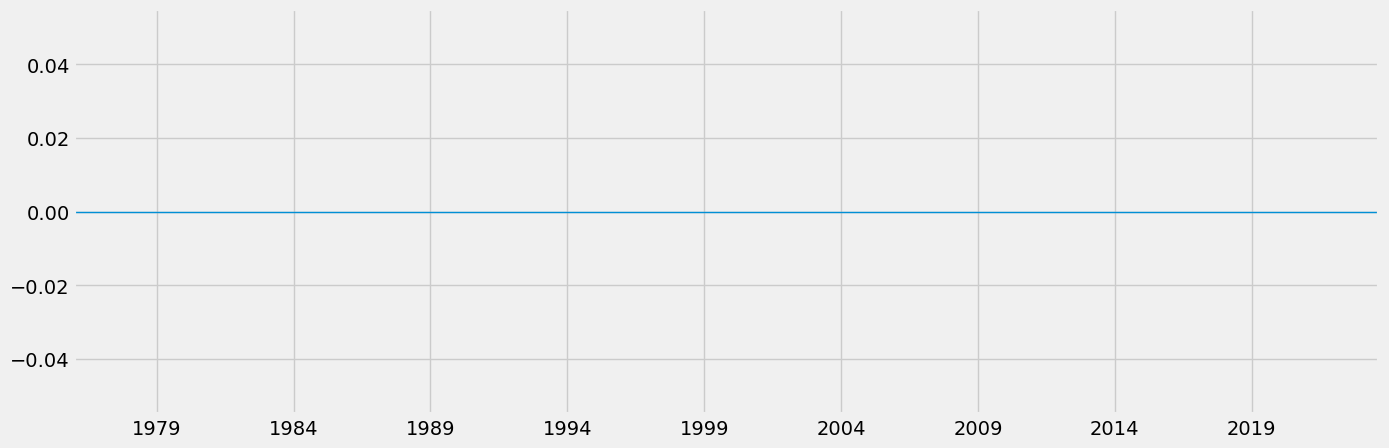

In [325]:
# part_states.isna().sum(axis = 1).plot(figsize = (15,5), lw = 1)
part_states = part_states.dropna()
part_states.isna().sum(axis = 1).plot(figsize = (15,5), lw = 1)

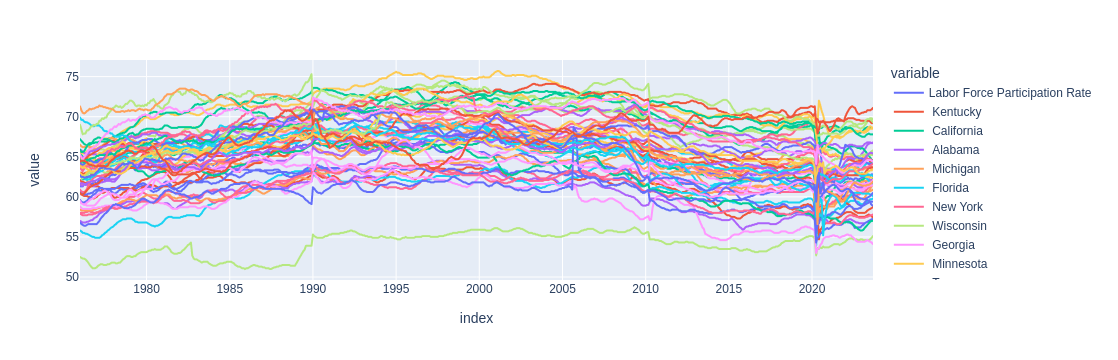

In [327]:
# part_states = part_states.set_index('Dates')
px.line(part_states)

## Plotting Unemployment vs participation:

In [328]:
# pd.to_datetime(unemp_states.index)
# pd.to_datetime(part_states.index)

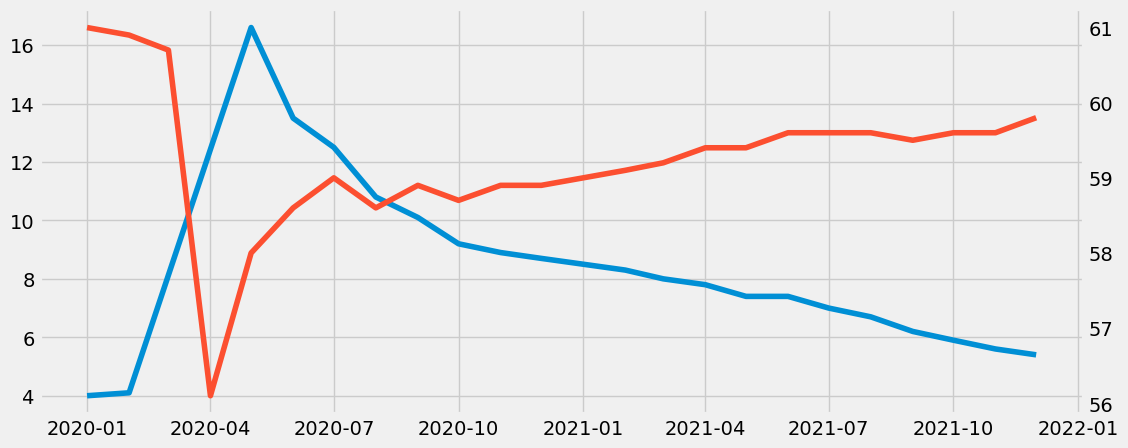

In [358]:
fig, ax = plt.subplots(figsize = (12,5))

ax2 = ax.twinx()

ax.plot(unemp_states.query('index >= 2020 and index < 2022')[' New York'], zorder = 2) 
ax.set_label = ('Unemployment')
# ax.grid(False)
ax2.plot(part_states.query('index >= 2020 and index < 2022')[' New York'], zorder = 1, color = colour_pal[1]) 
ax2.set_label = ('Participation')
ax2.grid(False)

plt.show()

Now, lets plot all the states

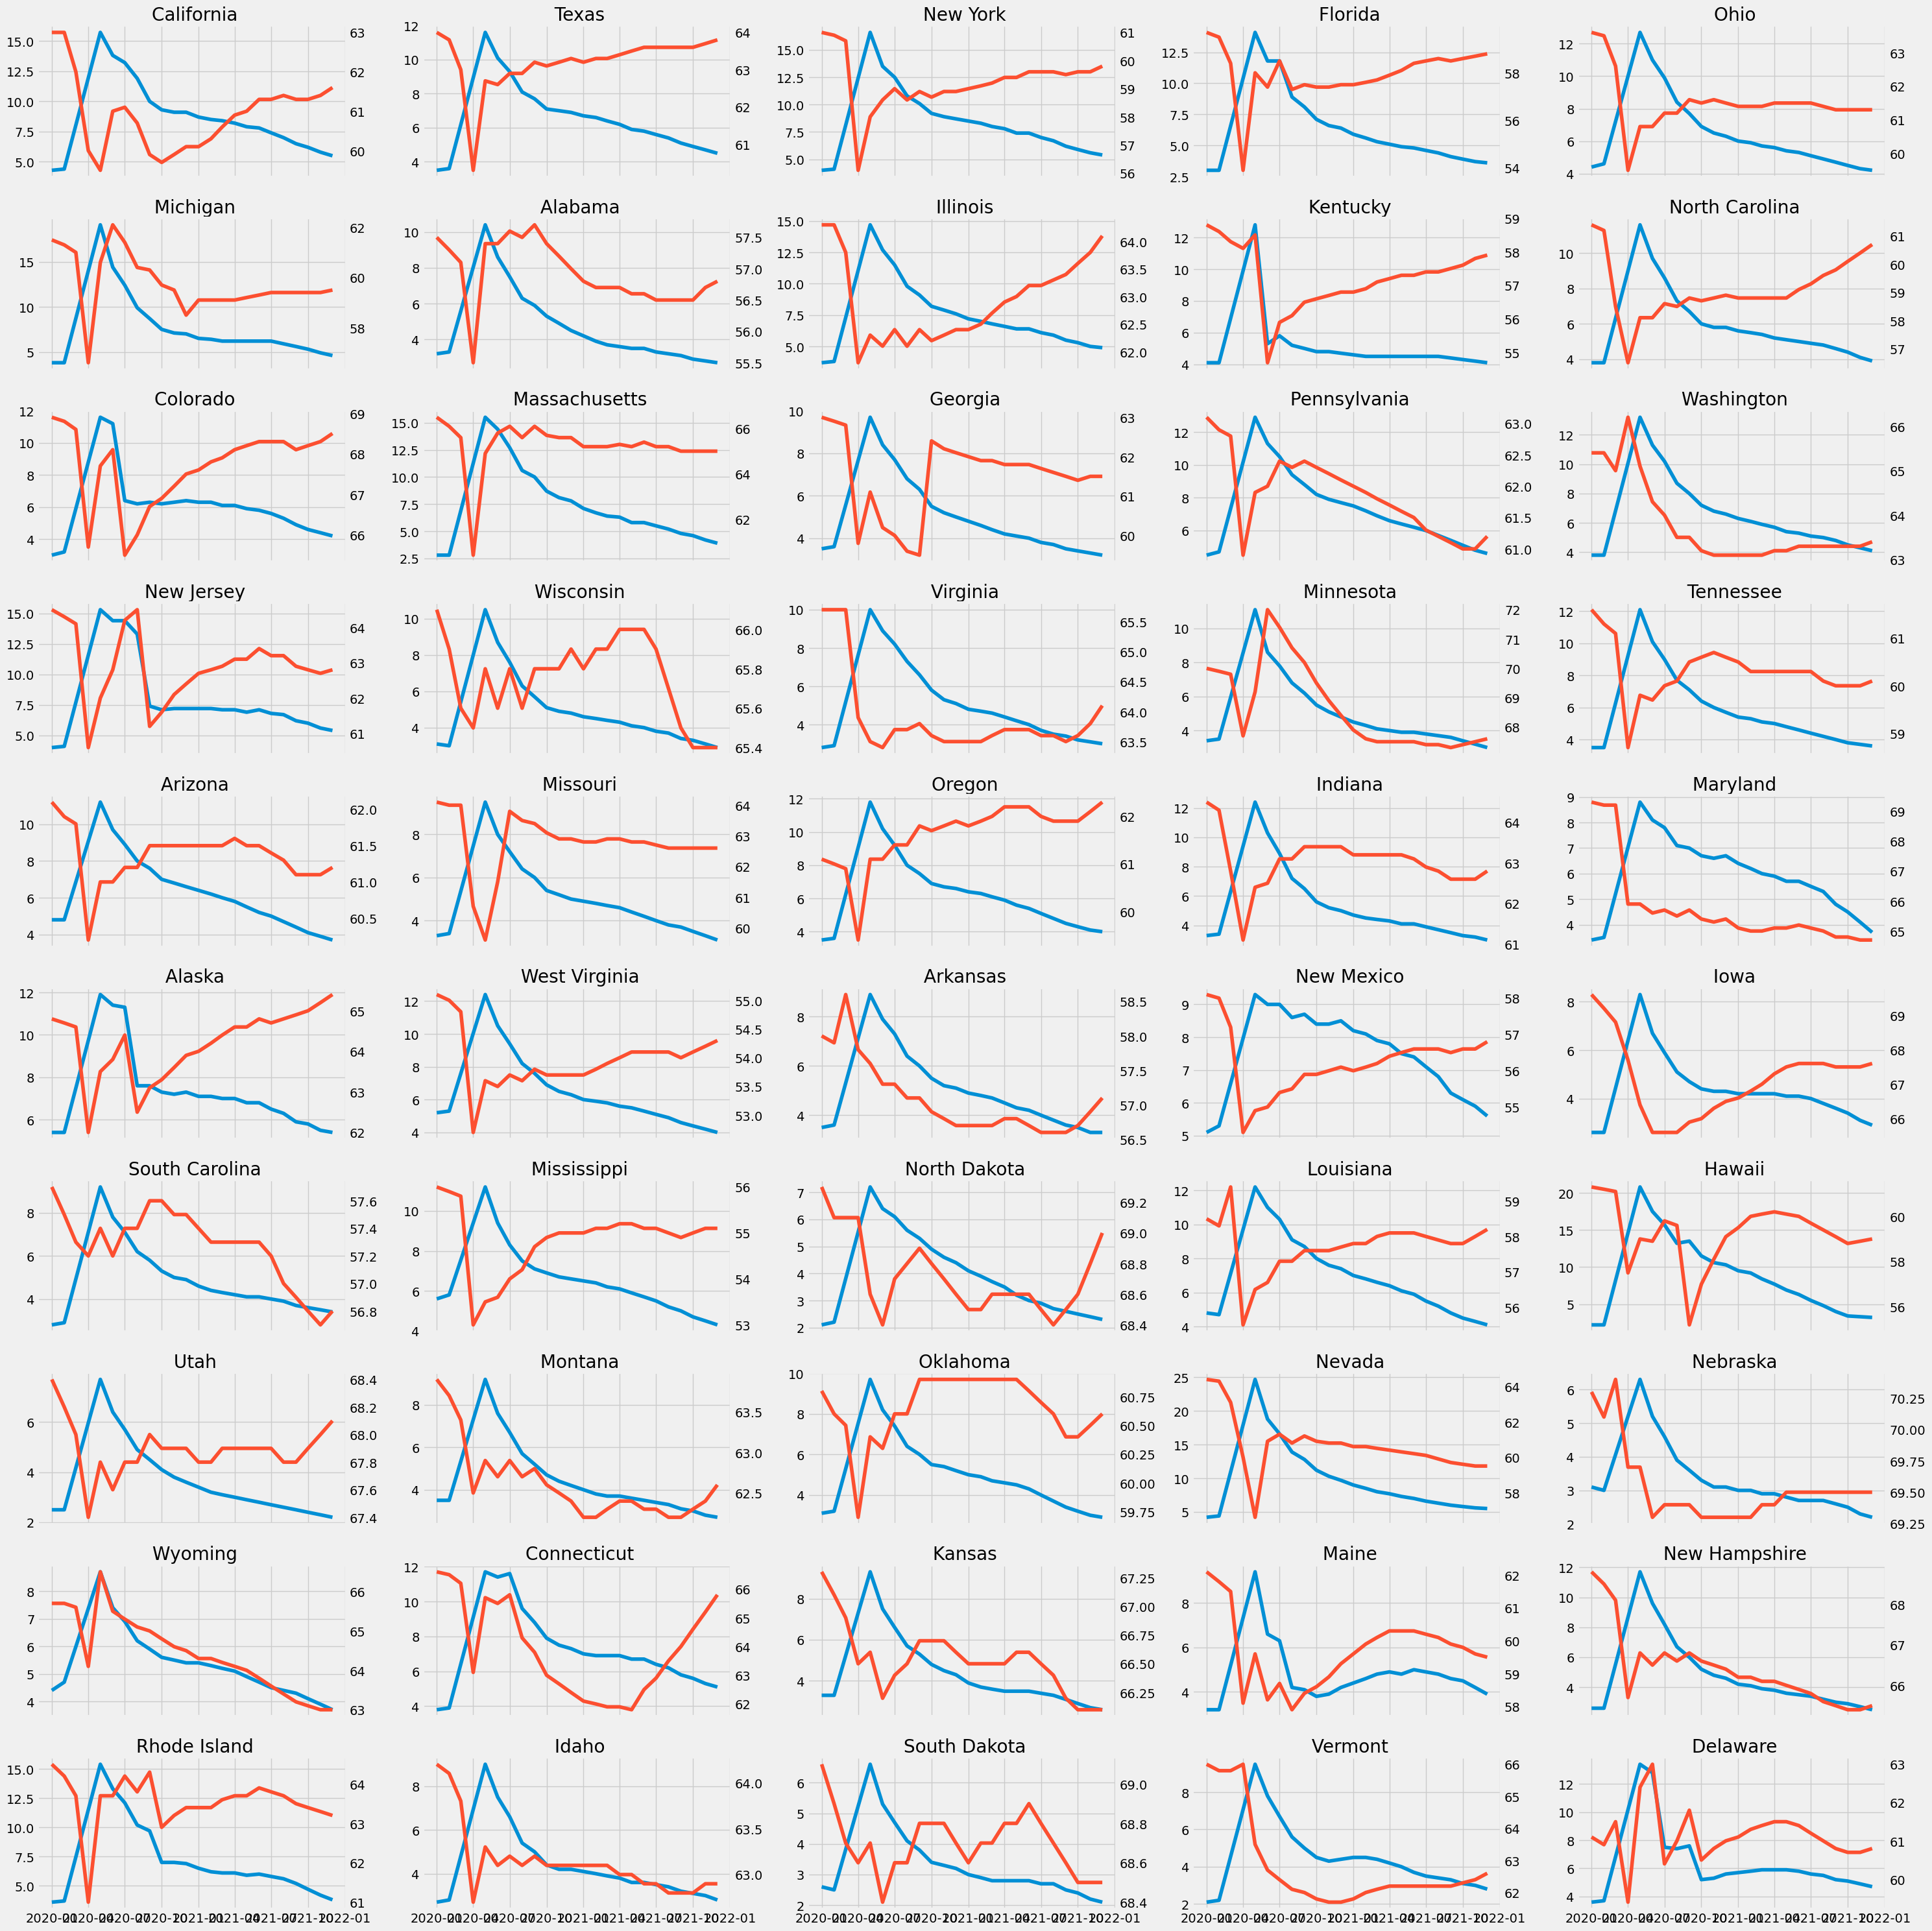

In [370]:
fig, axs = plt.subplots(10,5, figsize= (30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state == ' the District of Columbia':
        continue
    if state == ' Puerto Rico':
        continue
    ax2 = axs[i].twinx()
    axs[i].plot(unemp_states.query('index >= 2020 and index < 2022')[state]) 
    axs[i].set_label = ('Unemployment')
    # ax.grid(False)
    ax2.plot(part_states.query('index >= 2020 and index < 2022')[state], color = colour_pal[1]) 
    ax2.set_label = ('Participation')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
    
plt.tight_layout()
plt.show()
    